# MCH Sampa digitization

In [265]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [266]:
def gamma4(time, startTime, adc,peakingTime):
    '''
    gamma4 returns the signal shape at a given time (in micro seconds)

    Parameters:
    time: time at which the signal should be evaluated (must be > startTime)
    startTime: starting time of the signal shape (in micro seconds)
    peakingTime: peaking time of the chip (in micro seconds)
    '''
    norm=55.0
    tmp=(time-startTime)/peakingTime
    if tmp<=0:
        return 0.0
    return norm*adc*math.exp(-4*tmp)*tmp**4

In [267]:
def f(*,startTime,adc,peakingTime):
    '''Closure: returns a function that just takes x as parameter'''
    def g(time):
        return gamma4(startTime+time,startTime,adc,peakingTime)
    return g

In [268]:
x = np.linspace(0,1400,500)
adc=1

In [269]:
y = [f(startTime=10,adc=adc,peakingTime=0.160)(x/1000.0) for x in x]
z = np.column_stack((x,y))
x[np.argmax(y)]

159.91983967935872

In [270]:
y2 = [f(startTime=10,adc=adc,peakingTime=0.300)(x/1000.0) for x in x]
z2 = np.column_stack((x,y2))
x[np.argmax(y2)]

300.2004008016032

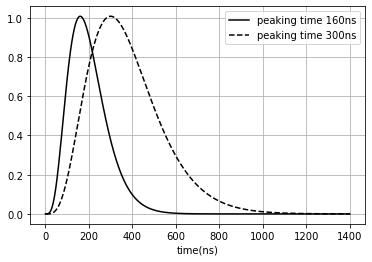

In [278]:
fig,ax=plt.subplots()
plt.plot(x,y,color="black",label="peaking time 160ns")
plt.plot(x,y2,color="black",linestyle="dashed",label="peaking time 300ns")
plt.legend()
ax.set_xlabel("time(ns)")
plt.grid()